In [1]:
%%html
<style>
  table {margin-left: 0 !important;}
</style>

# Trabalho em Grupo
(até 4 integrantes)

- **Curso:** FGV MBA - Business Analytics and Big Data
- **Disciplina:** Modelagem Estatística Avançada
- **Professor:** Rodrigo Marotti Togneri

## Alunos
|Github|Nome|Matricula|E-mail|
|---|---|---|---|
|<a href="https://github.com/DanielFCampos"><img src="https://avatars2.githubusercontent.com/u/31582602?s=460&v=4" title="DanielFCampos" width="40" height="40"></a>|Daniel Campos|A57635769|[daniel.ferraz.campos@gmail.com](daniel.ferraz.campos@gmail.com)|
|<a href="https://github.com/ldaniel"><img src="https://avatars2.githubusercontent.com/u/205534?s=460&v=4" title="ldaniel" width="40" height="40"></a>|Leandro Daniel|A57622988|[contato@leandrodaniel.com](contato@leandrodaniel.com)|
|<a href="https://github.com/RodriGonca"><img src="https://avatars2.githubusercontent.com/u/50252438?s=460&v=4" title="RodriGonca" width="40" height="40"></a>|Rodrigo Goncalves|A57566093|[rodrigo.goncalves@me.com](rodrigo.goncalves@me.com)|
|<a href="https://github.com/ygorlima1"><img src="https://avatars2.githubusercontent.com/u/52429828?s=460&v=4" title="ygorlima1" width="40" height="40"></a>|Ygor Lima|A57549661|[ygor_redesocial@hotmail.com](ygor_redesocial@hotmail.com)|

# Enunciado

Este programa simula a chegada de clientes a um banco, que possui alguns postos de atendimento (caixas). A fila é única para todos os caixas.
Os tempos entre chegadas de clientes segue uma distribuição exponencial.
A duração do atendimento a um cliente no caixa segue uma distribuição normal. 

Ao final, você encontra algumas sugestões de melhorias neste programa, que você pode fazer como exercício.

## Conceitos

#### Eventos 
É uma lista de eventos programados, sendo que cada evento
pode ser:
*   -1 é o evento da chegada de um cliente ao banco
*   0, 1, 2 ... é o evento do término do atendimento de um cliente
no caixa 0, 1, 2, ...

#### Horario de Eventos
É a lista dos horários em que ocorrerão os eventos programados na lista **eventos**.

#### Caixas
É uma lista dos caixas (postos de atendimentos). Cada caixa pode estar em um dos seguintes estados:
*   "livre"
*   "ocupado"

#### Fila
É uma lista que contém os horários de chegada dos clientes que comporão a fila de atendimento. Serve para podermos medir o tempo de espera em fila.

#### Horario
Variável inteira com o horário atual. O tempo é medido em segundos, contados a partir do instante 0 (instante em que a simulação começou a ser executada).

#### Tempos de Espera
Lista que registra o tempo de espera na fila de cada cliente que vem ao banco. Se o cliente não encontrou nenhuma fila, registra zero. Unidade é minutos (e não segundos!). 

## Código Original

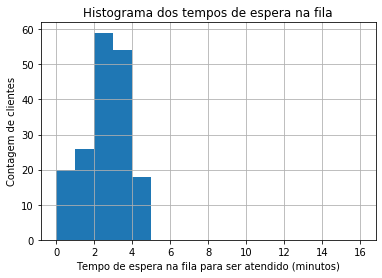

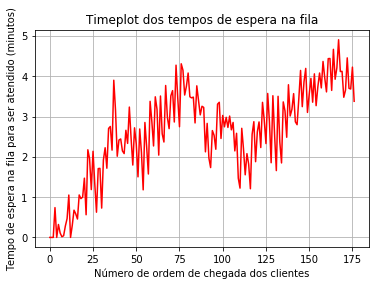

In [2]:
import random # biblioteca para geração de números aleatórios
import time   # biblioteca que possui função para gerar espera no processamento

# "magic funcion" para gráficos aparecerem aqui no Jupyter
%matplotlib inline 

from matplotlib import pyplot as plt  # biblioteca gráfica

random.seed(1) # define semente fixa para geração de números pseudo-aleatórios

#---------------------------------------------------------------------

# Horário corrente (inteiro, em segundos) começa em zero.
horario = 0 

# A lista de ventos começa, de início, com um único evento: a chegada de um
# cliente. Este evento ocorrerá no instante 0.
eventos = [-1]
horario_eventos = [0]

# Aqui está o estado inicial dos postos de atendimento (caixas).
caixas = ["livre", "livre", "livre"]

# A fila de atendimento começa vazia (ninguém na fila). 
fila = []

# Não há registros de tempos de espera pelos clientes (ninguém chegou ainda!).
tempos_espera = []

#---------------------------------------------------------------------

# Chegada de um novo cliente ao banco
# A função chegada() não recebe enhum parâmtro e não devolve nenhum resultado.

def chegada():  
    
    # As variáveis abaixo estão no programa principal.
    global horario, eventos, horario_eventos, caixas, fila
    
    # Programa a chegada de um próximo cliente após um tempo aleatório. 
    eventos.append(-1)
    h = horario + random.gauss(59,8) # normal, especificando média e dp
    horario_eventos.append(h)
    #print("Programado evento de chegada de novo cliente aos", round(h,1), "segundos")
    
    # Se há caixa livre, programa o evento o término do atendimento de cliente
    # recém chegado neste caixa.
    # Se não há caixa livre, cliente vai para fila de espera. 
    if "livre" in caixas:            # verifica aqui se há caixa livre   
        i = caixas.index("livre")    # em havendo caixa livre, descobre qual caixa
        caixas[i] = "ocupado"        # o caixa passa a estar acupado agora
        eventos.append(i)            # gera evento do término do atendimento
        h = horario + random.gauss(180, 30) # normal, especificando média e dp
        horario_eventos.append(h)    # registra o horário programado para o final
                                     # desse atendimento
        tempos_espera.append(0)      # registra a espera deste cliente (0 seg) 
        #print("Programado evento de final de atendimento no caixa ", i, " aos", round(h,1), "segundos")
    else:
        fila.append(horario)       # estando todos os caixas ocupados, 
                                   # põe cliente na fila (anota-se na fila o
                                   # o instante de chegada deste cliente)
        
#---------------------------------------------------------------------     
        
# Trata o eventos do término do atendimento do cliente no caixa i. 
# Se há cliente na fila, aloca-o neste caixa, programando o término do
# atendimento neste caixa. 
# A função saida(i) recebe, como parâmetro o número do caixa terminou de
# atender seis cliente. Mas a função nada retorna como resultado. 

def saida(i):
  
    # As variáveis abaixo estão no programa principal.
    global horario, eventos, horario_eventos, caixas, fila
    
    if len(fila) == 0:        # Caixa foi liberado, mas não há cliente
        caixas[i] = "livre"   # na fila --> muda status deste caixa para livre.
    else:
        # Havendo cliente na fila, registra quantos minutos ele esperou
        # para ser atendido e registra essa informação. Retira o cliente da
        # fila. Programa o final do atendimento do cliente nesse caixa. 
        tempos_espera.append((horario-fila[0])/60) # espera = agora - chegada
        del fila[0]
        eventos.append(i)
        y = horario+random.gauss(180, 30)
        horario_eventos.append(y)
        #print("Programado evento de final de atendimento no caixa ", i, " aos", round(y, 1), "segundos")
        
#---------------------------------------------------------------------     

# Descobre qual o próximo evento a tratar na lista de eventos.
# A função proximo_evento() não recebe parâmetros e devolve, como resposta,
# qual é o próximo evento (-1 = chegada de cliente, 0, 1, 2... = término de
# atendimento em um caixa). 
# Para tanto procura em horario-eventos o horário mais próximo (o menor deles). 
# Se há cliente na fila, aloca-o neste caixa,
# programando o término do atendimento neste caixa. 
# A lista de eventos nunca estará vazia, por construção. 
# Essa função retorna o tipo do próximo evento (-1, 0, 1, 2..). 

def proximo_evento():
  
    global horario, eventos, horario_eventos, caixas, fila
    
    
    pos = horario_eventos.index(min(horario_eventos)) # index do próximo evento
    evento = eventos[pos]                             # obtém evento
    horario = horario_eventos[pos]                    # obtém horário do evento
    if evento == -1:
        e = "chegada de cliente"
    else:
        e = "término de atendimento no caixa " + str(evento)
    
    #print("Tratando evento = " + e + ", horário do evento =", round(horario, 1), "segundos")
    eventos.pop(pos)            # apaga o referido evento da lista de eventos
    horario_eventos.pop(pos)    # apaga horário do evento na lista dos horários
    return evento               # devolve o evento para o programa principal
    
# -----------------------------------------------------------------------
    
# PROGRAMA PRINCIPAL

# Trata eventos programados durante as 3 primeiras horas.
while horario < 60*60*3:  # 3 horas
 
    # time.sleep(1) # para melhorar a apresentação (ser quiser fazê-la pausada)
  
    x = proximo_evento()   # descobre qual é e trata o próximo evento
    if x == -1:
        chegada()
    else:  # é Saída
        saida(x)
      
    #print("Tamanho da fila = ", len(fila)) # imprime tamanho da fila
    #print("Caixas: " , caixas)             # imprime situação dos caixas

#print()
#print()
#print("**** Tempo máximo de espera na fila (minutos): ", round(max(tempos_espera), 1))
#print("**** Tempo médio de espera na fila (minutos): ", round(sum(tempos_espera)/len(tempos_espera), 1))
#print()
#print()

# gera histograma dos tempos de espera na fila
plt.hist(tempos_espera, bins = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16])
plt.title('Histograma dos tempos de espera na fila')
plt.xlabel("Tempo de espera na fila para ser atendido (minutos)")
plt.ylabel("Contagem de clientes")
plt.grid(True)
plt.show()

# gera line plot dos tempos de espera na fila
plt.plot(tempos_espera, color = "r")
plt.title('Timeplot dos tempos de espera na fila')
plt.xlabel("Número de ordem de chegada dos clientes")
plt.ylabel("Tempo de espera na fila para ser atendido (minutos)")
plt.grid(True)
plt.grid(True)
plt.show()

# **Exercícios**

a) Evolua a programa acima.

b) Permita que o usuário escolha a distribuições de probabilidade para os tempos entre chegadas de clientes. No programa acima, usamos a Distribuição Normal (parâmetros são o tempo médio e o desvio-padrão). Mas, uma melhor distribuição de probabilidades para esses tempos é a Distribuição Exponencial, cujo único parâmetro é a média (o desvio-padrão é sempre igual à média nesta distribuição). Permita também que o usuário escolha os parâmetros da distribuição.

c) Permita que o usuário escolha os parâmetros da distribuição normal de probabilidades para a duração do atendimento no caixa. 

d) Faça com que o programa informe o tamanho máximo da fila de clientes no banco.

e) Permita que o usuário defina o número de caixas disponíveis. 

f) Introduza o conceito de cliente senior. Usuário deve informar a probabilidade de um cliente ser Senior. Faça com que o caixa 0 dê prioridade aos clientes senior.

Dicas:
*   normal: random.gauss(média, dp)
*   uniforme discreta: random.randint(mínimo, máximo)
*   uniforme contínua: random.uniform(mínimo, máximo)
*   exponencial: random.expovariate(1/média)








# Respostas

Iniciamos por reescrever a solução utilizando a abordagem de criar uma classe chamada ***queue_simulation***, onde o usuário pode passar os seguintes parâmetros no momento de criar uma instanciada classe:

|Parâmetro|Observações|
|---|---|
|distribuicao_chegada|Informar a função de distribuição a ser utilizada para calcular a tempo de chegado dos clientes. (`gauss` ou `exp`)|
|distribuicao_atendimento|Informar a função de distribuição a ser utilizada para calcular a tempo de atendimento dos clientes. (`gauss` ou `exp`)|
|media_chegada|Média, em segundos, utilizada para cálculo do tempo de chegada do cliente|
|desvio_padrao_chegada|Desvio padrão, em segundos, utilizado para cálculo do tempo de chegada do cliente. Sem efeito no caso de distribuição exponencial `exp`.|
|media_atendimento|Média, em segundos, utilizada para cálculo do tempo de atendimento do cliente|
|desvio_padrao_atendimento|Desvio padrão, em segundos, utilizado para cálculo do tempo de atendimento do cliente. Sem efeito no caso de distribuição exponencial `exp`.|
|numero_de_caixas|Numero de caixas disponíveis|
|senior_prioridade|Indica se o caixa 1 será prioritário para clientes Seniors. (`True` or `False`)|
|senior_probabilidade|Indica a probabilidade de um cliente ser Senior.|
|verbose|Indica se a simulação deve ocorrer com pausa e se dados de cada evendo devem ser demosntrados. Default = `False`|

Adicionalmente o usuário podera infomar o tempo em horas da simulação ao invocar o methodo `run_simulation(horas_de_simulacao)`.

In [3]:
%matplotlib inline

import numpy as np
import pandas as pd
import random
import time
import sys

from matplotlib import pyplot as plt
import seaborn as sns

class queue_simulation():
    
    def __init__(self, distribuicao_chegada, distribuicao_atendimento, 
                 media_chegada, desvio_padrao_chegada, 
                 media_atendimento, desvio_padrao_atendimento, 
                 numero_de_caixas, 
                 senior_prioridade, senior_probabilidade, verbose = False):
        
        self.distribuicao_chegada = distribuicao_chegada
        self.distribuicao_atendimento = distribuicao_atendimento
        self.media_chegada = media_chegada
        self.desvio_padrao_chegada = desvio_padrao_chegada
        self.media_atendimento = media_atendimento
        self.desvio_padrao_atendimento = desvio_padrao_atendimento
        self.senior_prioridade = senior_prioridade
        self.senior_probabilidade = senior_probabilidade
        self.verbose = verbose
        self.numero_de_caixas = numero_de_caixas

        self.caixas = []
        for x in range(self.numero_de_caixas):
            self.caixas.append('livre')
        self.horario = 0
        self.eventos = [-1]
        self.horario_eventos = [0]        
        self.fila = []
        self.tipo_cliente_fila = []
        self.tempos_espera = []    
        self.tamanho_fila = []
        self.relogio = []
        self.senior = False
        self.seniors = 0
        self.non_seniors = 0

    def reset_simulation(self):

        self.caixas = []
        for x in range(self.numero_de_caixas):
            self.caixas.append('livre')
        self.horario = 0
        self.eventos = [-1]
        self.horario_eventos = [0]        
        self.fila = []
        self.tipo_cliente_fila = []
        self.tempos_espera = []    
        self.tamanho_fila = []
        self.relogio = []
        self.senior = False
        self.seniors = 0
        self.non_seniors = 0

    def find_first_senior(self):
        df = pd.DataFrame({'tipo': self.tipo_cliente_fila,
                          'horario': self.fila})

        first_senior = df[df['tipo'] == -2]['horario'].min()

        df = df.index[df['horario'] == first_senior].tolist()
        
        if df == []:
            return 0
        else:
            return df[0]
        
    def chegada(self):

        if not self.senior:
            self.eventos.append(-1)
            self.non_seniors += 1
        else:
            self.eventos.append(-2)
            self.seniors += 1

        if self.distribuicao_chegada == 'gauss':
            h = self.horario + random.gauss(self.media_chegada, self.desvio_padrao_chegada)
        elif self.distribuicao_chegada == 'exp':
            h = self.horario + random.expovariate( 1 / self.media_chegada)
        else:
            raise ValueError('Distribução de chegada não suportada')

        self.horario_eventos.append(h)

        if "livre" in self.caixas:
            i = self.caixas.index("livre")
            self.caixas[i] = "ocupado"
            self.eventos.append(i)

            if self.distribuicao_atendimento == 'gauss':
                h = self.horario + random.gauss(self.media_atendimento, 
                                                self.desvio_padrao_atendimento)
            elif self.distribuicao_atendimento == 'exp':
                h = self.horario + random.expovariate( 1 / self.media_atendimento)
            else:
                raise ValueError('Distribução de atendimento não suportada')

            self.horario_eventos.append(h)

            self.tempos_espera.append(0)
            
            if self.verbose: 
                print("Programado evento de final de atendimento no caixa ", i, 
                      " aos", round(h, 1), "segundos ")

        else:
            self.fila.append(self.horario)
            if not self.senior:
                self.tipo_cliente_fila.append(-1)
            else:
                self.tipo_cliente_fila.append(-2) # Senior
    
    def saida(self, i):

        if len(self.fila) == 0:
            self.caixas[i] = "livre"
        else:
            self.tempos_espera.append((self.horario - self.fila[0]) / 60)
            if i == 0:
                if self.senior_prioridade:
                    first_senior = self.find_first_senior()
                    del self.fila[first_senior]
                    del self.tipo_cliente_fila[first_senior]
                else:
                    del self.fila[0]
                    del self.tipo_cliente_fila[0]
            else:
                del self.fila[0]
                del self.tipo_cliente_fila[0]

            self.eventos.append(i)
            
            if self.distribuicao_atendimento == 'gauss':
                y = self.horario + random.gauss(self.media_atendimento, 
                                                self.desvio_padrao_atendimento)
            elif self.distribuicao_atendimento == 'exp':
                y = self.horario + random.expovariate(1 / self.media_atendimento)
            else:
                raise ValueError('Distribução de atendimento não suportada')
            
            self.horario_eventos.append(y)
            
            if self.verbose: 
                print("Programado evento de final de atendimento no caixa ", i, 
                      " aos", round(y, 1), "segundos")
    
    def proximo_evento(self):

        if self.senior_prioridade:
            self.senior = np.random.choice(a = [True, False], 
                                           size = 1, 
                                           p = [self.senior_probabilidade, 
                                                1 - self.senior_probabilidade])[0]

        pos = self.horario_eventos.index(min(self.horario_eventos))
        evento = self.eventos[pos]
        self.horario = self.horario_eventos[pos]

        if self.verbose: 
            if evento == -1 or evento == -2:
                e = f"chegada de cliente (senior = {self.senior})"
            else:
                e = "término de atendimento no caixa " + str(evento)
            print("Tratando evento = " + e + ", horário do evento =", 
                  round(self.horario, 1), "segundos")
        
        self.eventos.pop(pos)
        self.horario_eventos.pop(pos)
        return evento

    def run_simulation(self, horas_de_simulacao):
    
        self.reset_simulation()
        while self.horario < 60 * 60 * horas_de_simulacao:
            
            if self.verbose: 
                run = input('Tecle (y) para executar: ')
                if run == 'y':
                    time.sleep(int(0))
                else:
                    sys.exit()

            x = self.proximo_evento()

            if x == -1 or x == -2:
                self.chegada()
            else:
                self.saida(x)

            self.tamanho_fila.append(len(self.fila))
            self.relogio.append(self.horario / 60 / 60)

            if self.verbose:
                print("**** Tempo máximo de espera na fila (minutos): ", 
                      round(max(self.tempos_espera), 1))
                print("**** Tempo médio de espera na fila (minutos): ", 
                      round(sum(self.tempos_espera) / len(self.tempos_espera), 1))
                self.debug()

    def debug(self):
        
        print('caixas: ', self.caixas)
        print('horario: ', self.horario)
        print('eventos: ', self.eventos)
        print('horario_eventos: ', self.horario_eventos)        
        print('fila: ', self.fila)
        print('tipo_cliente_fila: ', self.tipo_cliente_fila)
        #print('tempos_espera: ', self.tempos_espera)    
        #print('tamanho_fila: ', self.tamanho_fila)
        print('senior: ', self.senior)
        #print('relogio: ', self.relogio)
        print('\n')

    def plot_simulation(self):
        
        plt.style.use('default')
        plt.rcParams["figure.figsize"] = (12, 8)
        plt.rcParams.update({'font.size': 10})

        fig, ax = plt.subplots(nrows = 2, ncols = 2)

        ax[0, 0].hist(self.tempos_espera)
        ax[0, 0].set_title('Histograma dos tempos de espera na fila')
        ax[0, 0].set_xlabel("Tempo de espera na fila para ser atendido (minutos)")
        ax[0, 0].set_ylabel("Contagem de clientes")

        sns.distplot(self.tempos_espera, hist = True, ax = ax[0, 1])
        ax[0, 1].set_title('Densidade dos tempos de espera na fila')
        ax[0, 1].set_xlabel("Tempo de espera na fila para ser atendido (minutos)")
        ax[0, 1].set_ylabel("Proporção")
        ax[0, 1].set_xlim(0)

        ax[1, 0].plot(self.tempos_espera, color = "r", alpha = 0.5, linewidth = 1)
        ax[1, 0].set_title('Timeplot dos tempos de espera na fila')
        ax[1, 0].set_xlabel("Número de ordem de chegada dos clientes")
        ax[1, 0].set_ylabel("Tempo de espera na fila para ser atendido (minutos)")

        ax[1, 1].plot(self.relogio, self.tamanho_fila, color = "g", alpha = 0.5, linewidth = 1)
        ax[1, 1].set_title('Timeplot do tamanho da fila')
        ax[1, 1].set_xlabel("horario Hrs")
        ax[1, 1].set_ylabel("Tamaho da fila em quantidade de pessoas")

        plt.tight_layout()


Uma vez declarada a classe, vamos criar uma instancia da mesma e explorar o resultado de uma simulação, de 8 horas, para os seguintes parâmetros:

|Parâmetro|Valores|
|---|---|
|distribuicao_chegada|`exp`|
|distribuicao_atendimento|`gauss`|
|media_chegada| um novo cliente a cada `60` segundos|
|desvio_padrao_chegada|Desvio padrão, de `None`. Sem efeito para uma distribuiçao `exp`.|
|media_atendimento|Média, de `240` segundos de tempo de atendimento de clientes|
|desvio_padrao_atendimento|Desvio padrão, de `30`, no tempo de atendimento de clientes.|
|numero_de_caixas|`4` caixas|
|senior_prioridade|`True`|
|senior_probabilidade|`0.1`|
|verbose|`False`|

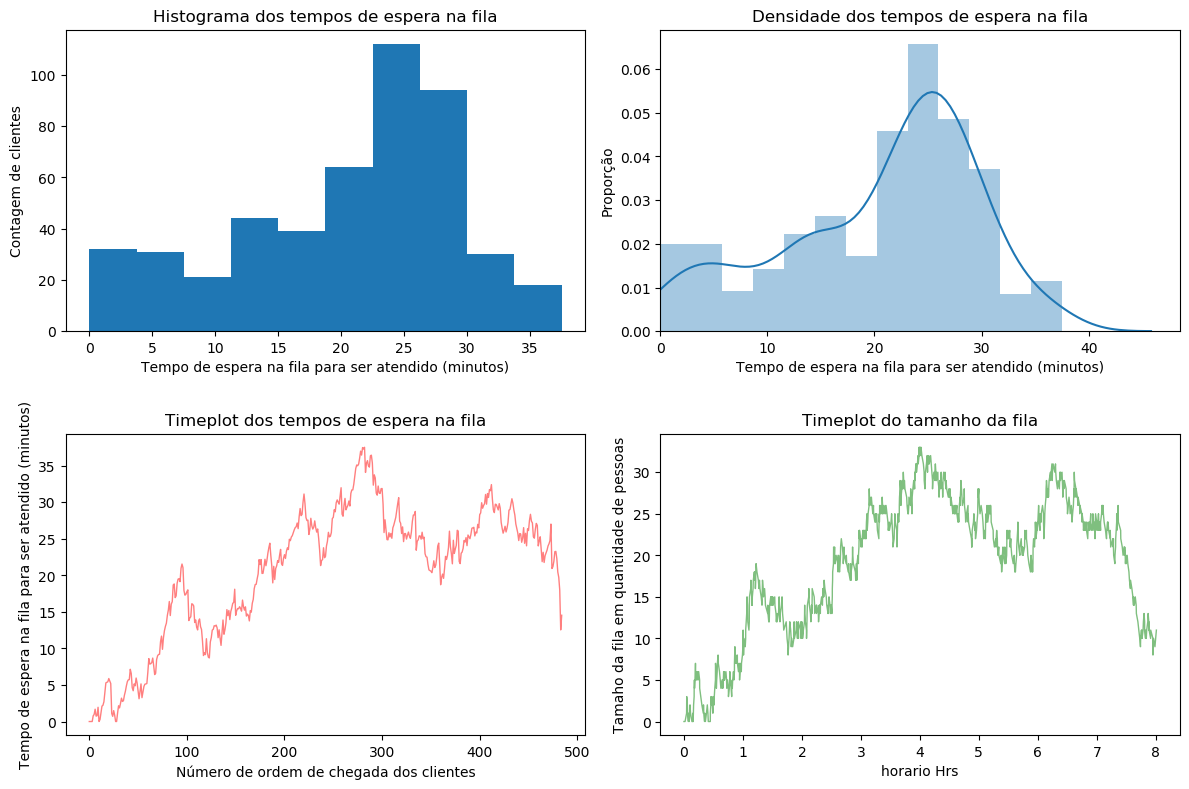

In [4]:
random.seed(1)
np.random.seed(1)

simulation_senior = queue_simulation(distribuicao_chegada = 'exp', 
                              distribuicao_atendimento = 'gauss', 
                              media_chegada = 60, 
                              desvio_padrao_chegada = None, 
                              media_atendimento = 240, 
                              desvio_padrao_atendimento = 30, 
                              numero_de_caixas = 4,
                              senior_prioridade = True, 
                              senior_probabilidade = 0.1, 
                              verbose = False)

simulation_senior.run_simulation(horas_de_simulacao = 8)

simulation_senior.plot_simulation()

Vamos também fazer uma segunda simulação desta vez desabilitando a funcionalidade de priorização de Seniors:

|Parâmetro|Valores|
|---|---|
|distribuicao_chegada|`exp`|
|distribuicao_atendimento|`gauss`|
|media_chegada| um novo cliente a cada `60` segundos|
|desvio_padrao_chegada|Desvio padrão, de `None`. Sem efeito para uma distribuiçao `exp`.|
|media_atendimento|Média, de `240` segundos de tempo de atendimento de clientes|
|desvio_padrao_atendimento|Desvio padrão, de `30`, no tempo de atendimento de clientes.|
|numero_de_caixas|`4` caixas|
|senior_prioridade|`False`|
|senior_probabilidade|`None`|
|verbose|`False`|

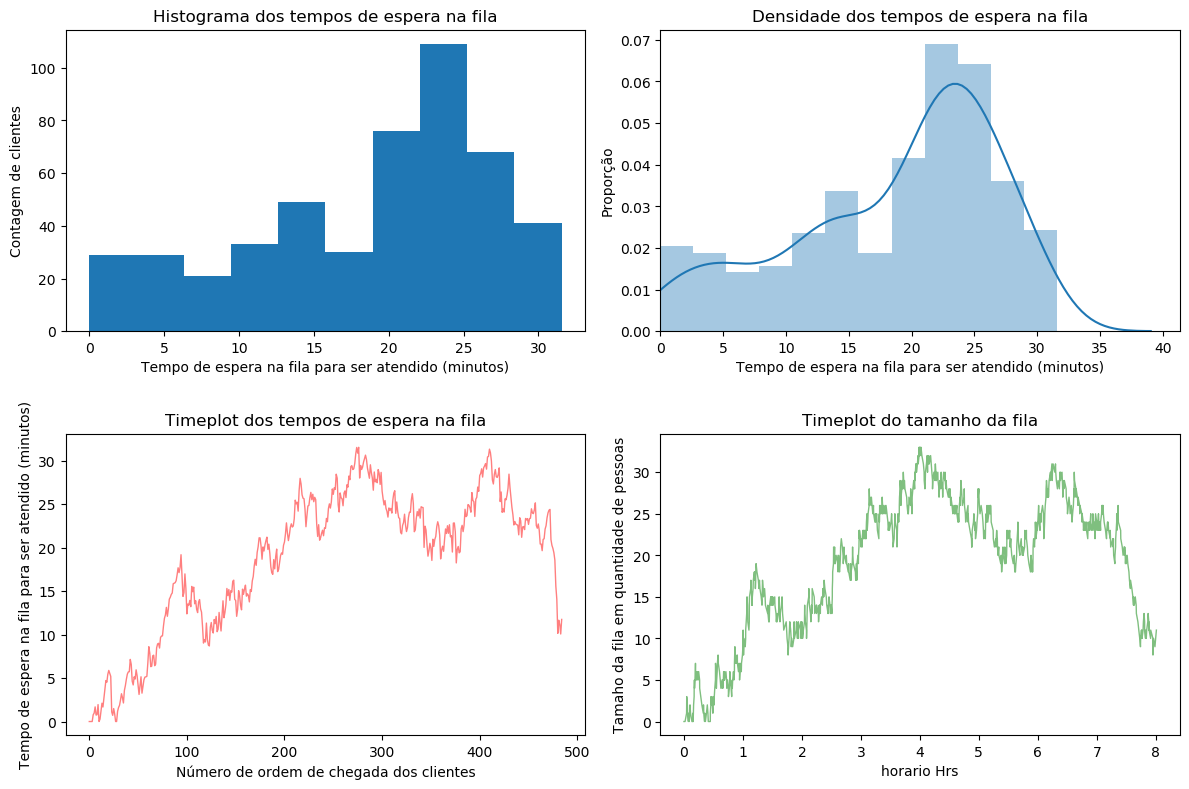

In [5]:
random.seed(1)
np.random.seed(1)

simulation_non_senior = queue_simulation(distribuicao_chegada = 'exp', 
                              distribuicao_atendimento = 'gauss', 
                              media_chegada = 60, 
                              desvio_padrao_chegada = None, 
                              media_atendimento = 240, 
                              desvio_padrao_atendimento = 30, 
                              numero_de_caixas = 4,
                              senior_prioridade = False, 
                              senior_probabilidade = None, 
                              verbose = False)

simulation_non_senior.run_simulation(horas_de_simulacao = 8)

simulation_non_senior.plot_simulation()

Agora podemos compara o tempo médio de espera de ambas as simulações:

In [6]:
print('Seniors - Quantidade de seniors: ', simulation_senior.seniors)
print('Seniors - Quantidade de non seniors: ', simulation_senior.non_seniors)
print('Seniors - Quantidade de clientes : ', simulation_senior.seniors + simulation_senior.non_seniors)

print()

print('Non Seniors - Quantidade de seniors: ', simulation_non_senior.seniors)
print('Non Seniors - Quantidade de non seniors: ', simulation_non_senior.non_seniors)
print('Non Seniors - Quantidade de clientes : ', simulation_non_senior.seniors + simulation_non_senior.non_seniors)

print()

print('Seniors - ', sum(simulation_senior.tempos_espera) / len(simulation_senior.tempos_espera))
print('Non Seniors - ', sum(simulation_non_senior.tempos_espera) / len(simulation_non_senior.tempos_espera))


Seniors - Quantidade de seniors:  53
Seniors - Quantidade de non seniors:  443
Seniors - Quantidade de clientes :  496

Non Seniors - Quantidade de seniors:  0
Non Seniors - Quantidade de non seniors:  496
Non Seniors - Quantidade de clientes :  496

Seniors -  20.53015245116472
Non Seniors -  18.732011734442064


Como podemos observar visualmente não é possível notar a diferenca, porem com a priorização de Senior temos um aumento de cerca de 2 min no tempo médio de espera.

Porém apenas uma simulação não seria capaz de capturar qual a tendência do comportamento da fila.

Para finalizar vamos então rodar 365 simulações para verificar qual seria o comportamento médio e a dispersão dos indicadores de uma fila de banco.

|Parâmetro|Valores|
|---|---|
|distribuicao_chegada|`exp`|
|distribuicao_atendimento|`gauss`|
|media_chegada| um novo cliente a cada `60` segundos|
|desvio_padrao_chegada|Desvio padrão, de `None`. Sem efeito para uma distribuiçao `exp`.|
|media_atendimento|Média, de `240` segundos de tempo de atendimento de clientes|
|desvio_padrao_atendimento|Desvio padrão, de `30`, no tempo de atendimento de clientes.|
|numero_de_caixas|`4` caixas|
|senior_prioridade|`False`|
|senior_probabilidade|`None`|
|verbose|`False`|

Wall time: 1min 58s


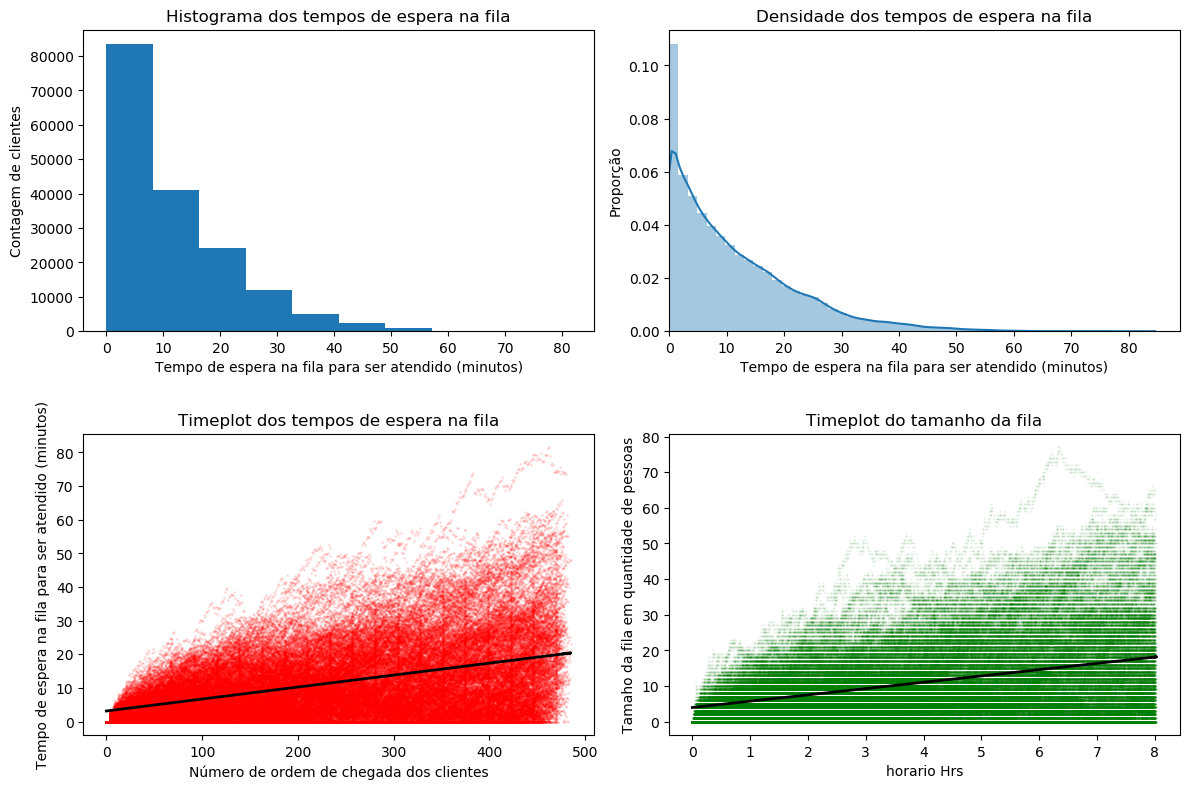

In [7]:
%%time
cliente_seq = []
tempos_espera = []
relogio = []
tamanho_fila = []

for i in range(365):
    
    simulation_senior.run_simulation(horas_de_simulacao = 8)
    
    cliente_seq.extend(range(len(simulation_senior.tempos_espera)))
    tempos_espera.extend(simulation_senior.tempos_espera)
    relogio.extend(simulation_senior.relogio)
    tamanho_fila.extend(simulation_senior.tamanho_fila)

def plot_simulation(tempos_espera, relogio, tamanho_fila):

    plt.style.use('default')
    plt.rcParams["figure.figsize"] = (12, 8)
    plt.rcParams.update({'font.size': 10})

    fig, ax = plt.subplots(nrows = 2, ncols = 2)

    ax[0, 0].hist(tempos_espera)
    ax[0, 0].set_title('Histograma dos tempos de espera na fila')
    ax[0, 0].set_xlabel("Tempo de espera na fila para ser atendido (minutos)")
    ax[0, 0].set_ylabel("Contagem de clientes")

    sns.distplot(tempos_espera, hist = True, ax = ax[0, 1])
    ax[0, 1].set_title('Densidade dos tempos de espera na fila')
    ax[0, 1].set_xlabel("Tempo de espera na fila para ser atendido (minutos)")
    ax[0, 1].set_ylabel("Proporção")
    ax[0, 1].set_xlim(0)
    
    z1 = np.polyfit(cliente_seq, tempos_espera, 1)
    p1 = np.poly1d(z1)

    ax[1, 0].scatter(cliente_seq, tempos_espera, color = "r", alpha = 0.1, s = 1)
    ax[1, 0].plot(cliente_seq, p1(cliente_seq), color = "black", linewidth = 2, linestyle = "-")
    ax[1, 0].set_title('Timeplot dos tempos de espera na fila')
    ax[1, 0].set_xlabel("Número de ordem de chegada dos clientes")
    ax[1, 0].set_ylabel("Tempo de espera na fila para ser atendido (minutos)")

    z2 = np.polyfit(relogio, tamanho_fila, 1)
    p2 = np.poly1d(z2)

    ax[1, 1].scatter(relogio, tamanho_fila, color = "g", alpha = 0.1, marker = '.', s = 1)
    ax[1, 1].plot(relogio, p2(relogio), color = "black", linewidth = 2, linestyle = "-")
    ax[1, 1].set_title('Timeplot do tamanho da fila')
    ax[1, 1].set_xlabel("horario Hrs")
    ax[1, 1].set_ylabel("Tamaho da fila em quantidade de pessoas")

    plt.tight_layout()

plot_simulation(tempos_espera, relogio, tamanho_fila)